In [1]:
import matplotlib.pyplot as plt

from cortix.src.port import Port
from cortix.src.module import Module
from cortix.src.cortix_main import Cortix
from cortix.util.dataplot import DataPlot

# Import the example fluid flow models
from cortix.examples.fluidflow.vortex import Vortex
from cortix.examples.fluidflow.droplet import Droplet

In [2]:
# Init the Cortix object (switch to multiprocessing for the notebook)
c = Cortix(use_mpi=False)

# Initialize and add the Vortex module to Cortix
v = Vortex()
c.add_module(v)

2019-07-22 14:13:13,713 - cortix - INFO - Created Cortix object


In [3]:
# Construct 5 droplets
num_drops = 5

for i in range(num_drops):
    droplet = Droplet()
    
    data_plot = DataPlot()
    data_plot.title = "Droplet Position Over Time"

    # Initialize the ports
    drop_port = Port("plot-data")
    plot_port = Port("plot-data-{}".format(i))
    vortex_velocity_port = Port("velocity")
    velocity_port = Port("velocity-{}".format(i))
    
    # Connect the ports
    drop_port.connect(plot_port)
    velocity_port.connect(vortex_velocity_port)

    # Add the ports to module
    data_plot.add_port(plot_port)
    droplet.add_port(drop_port)
    droplet.add_port(vortex_velocity_port)
    v.add_port(velocity_port)

    # Add the modules to Cortix
    c.add_module(droplet)
    c.add_module(data_plot)

In [4]:
# Run the simulation!
c.run()

2019-07-22 14:13:13,846 - cortix - INFO - Launching Module <cortix.examples.fluidflow.vortex.Vortex object at 0x7ff1ef40f6a0>
2019-07-22 14:13:13,853 - cortix - INFO - Launching Module <cortix.examples.fluidflow.droplet.Droplet object at 0x7ff1ef3ccdd8>
2019-07-22 14:13:13,859 - cortix - INFO - Launching Module <cortix.util.dataplot.DataPlot object at 0x7ff1ef3ccf28>
2019-07-22 14:13:13,867 - cortix - INFO - Launching Module <cortix.examples.fluidflow.droplet.Droplet object at 0x7ff1eecda048>
2019-07-22 14:13:13,875 - cortix - INFO - Launching Module <cortix.util.dataplot.DataPlot object at 0x7ff1eecda160>
2019-07-22 14:13:13,881 - cortix - INFO - Launching Module <cortix.examples.fluidflow.droplet.Droplet object at 0x7ff1eecdaef0>
2019-07-22 14:13:13,888 - cortix - INFO - Launching Module <cortix.util.dataplot.DataPlot object at 0x7ff1eecdafd0>
2019-07-22 14:13:13,896 - cortix - INFO - Launching Module <cortix.examples.fluidflow.droplet.Droplet object at 0x7ff1eece0da0>
2019-07-22 14:

/home/taha/.local/lib64/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


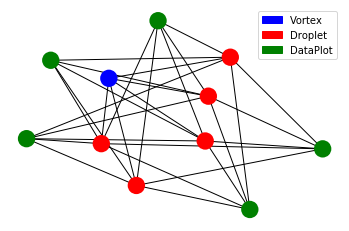

In [5]:
# View the Cortix module network
c.draw_network()
plt.show()